In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.special import gamma
from math import pi
from scipy.special import wright_bessel


In [2]:
""" Data Importation """

#path = "C:/Users/Amaury/Documents/CentraleSupelec/3A/Projet/"
file = "Data issuers.xlsx"
market_cap = pd.read_excel(file, sheet_name="Mod Market Cap")
market_cap = market_cap.set_index("Dates").loc['2019-10-28':'2020-10-13']
debt = pd.read_excel(file, sheet_name="Gross Debt", nrows=1)

In [3]:
def grey_call_price(gama,S0,K,r,sigma,tau,Ns,Nmu):

    mu1=-sigma**2/2
    
    emu=0
    for n in range(Nmu):
        emu+= (-1)**n * gamma(1+2*n)*mu1**n / ( np.math.factorial(n)* gamma(1+2*gama*n)   )
    mu=-np.log(emu)

    x=np.log(S0/K) + r*tau


    c=-mu*tau**gama
    s=0

    for n in range (Ns):
        for m in range (1,Ns):
            s+= ((-1)**n)   *((x-mu*tau)**n) * ((c)**((m-n)/2)) /  (np.math.factorial(n)* gamma(1-gama*((n-m)/2)))

    return(s*K*np.exp(-r*tau)/2 )

C:\Users\amaur\AppData\Local\Temp\ipykernel_7220\2178401654.py:8: RuntimeWarning: divide by zero encountered in log
  mu=-np.log(emu)


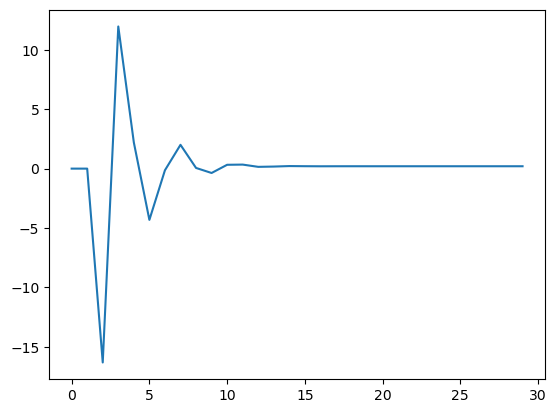

In [4]:
gama=0.9
S0=150
K=90
r=0.05
sigma=0.25
tau = 1

C=[ grey_call_price(gama,S0,K,r,sigma,tau,Ns=k,Nmu=k) for k in range (30)]

plt.plot(C)

In [5]:
from mpmath import *



In [6]:
nu=0.75
fp = lambda p: exp(-p**nu)

g=invertlaplace(fp,2)
float(g)

0.10718999297528156

In [7]:
def m_wright(nu,x):

    """
    x>0
    """

    fp = lambda p: exp(-p**nu)
    r= (1/x)**(1/nu)

    Mnu=float(invertlaplace(fp,r))*(r**(nu+1))/nu
    return(Mnu)



In [8]:
def Xdensity(x,beta,omega,t):
    d=np.sqrt(omega)*t**(beta/2)
    return(

        (0.5/d)*m_wright(beta/2,abs(x)/d)
    )

Verification: Xdensity est bien d'integrale 1 

In [16]:
#Verification: Xdensity est bien d'integrale 1 
from scipy.integrate import quad
beta=1.3
omega=10
t=2

quad(Xdensity,-np.inf,np.inf,args=(beta,omega,t))

(1.0000000000000029, 9.232245827508919e-10)

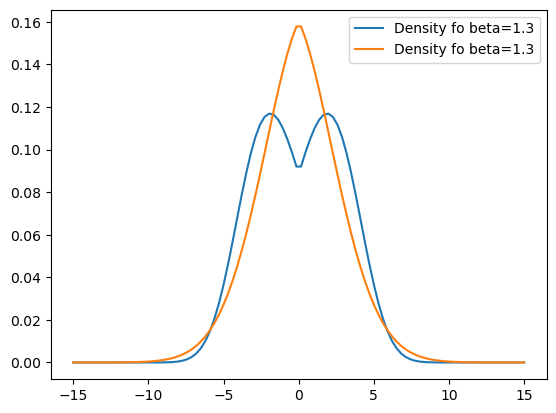

In [74]:
beta=1.3
omega=2
t=2
X=linspace(-15,15,100)

Y1=[Xdensity(x,beta,omega,t)  for x in X]
Y2=[Xdensity(x,0.9,omega,t)  for x in X]


plt.plot(X,Y1,label="Density fo beta=1.3")
plt.plot(X,Y2,label="Density fo beta=1.3")
plt.legend()


Moment d'ordre n, pour n paire uniquement

In [18]:
def formule_JPA(n,omega,t,beta):
    return(
        (gamma(2*n+1)/gamma(beta*n+1))*(omega*t**beta)**n
    )

In [19]:
def formule_AR(n,omega,t,beta):
    d=np.sqrt(omega)*t**(beta/2)

    return(
        (gamma(n+1)/gamma(beta*n*0.5+1))*d**n
    )

In [20]:
def Xdensity_n(x,beta,omega,t,n):
    d=np.sqrt(omega)*t**(beta/2)
    return(

        (0.5/d)*m_wright(beta/2,abs(x)/d)*x**n
    )

In [21]:
beta=1.3
omega=1.9
t=3.7
n=2
print(formule_JPA(n,omega,t,beta),formule_AR(n,omega,t,beta))
quad(Xdensity_n,-np.inf,np.inf,args=(beta,omega,t,n))

699.596419499973 17.8435888799026


(17.843588879902637, 9.762148703449991e-08)

In [22]:
def mu_density(x,beta,omega,t):
    return(
        exp(x)*Xdensity(x,beta,omega,t)
    )

In [49]:
beta=1 #omega obtained with beta =1 
# or ( omega(beta?)tq omega=float(log(quad(mu_density,-np.inf,np.inf,args=(beta,omega,t))[0]))  )? (with solver)
omega=5.28
t=1
n=2
float(log(quad(mu_density,-np.inf,np.inf,args=(beta,omega,t))[0]))

5.2799999999999985

In [65]:
def call_price_density(x,beta,mu,omega,S0,K,r,tau):
    return(
        max(S0*exp( tau*(r+mu) + x ) -K,0)*Xdensity(x,beta,omega,tau) #mu=omega?
    )

def grey_call_price_integrated(beta,S0,K,r,tau):

    #omega=?
    #mu=?
    return(
        float(np.exp(-r*tau)*quad(call_price_density,-np.inf,100,args=(beta,0.5,0.5,S0,K,r,tau))[0])
    )
    
    

In [67]:
beta=1.1
S0=150
K=90
r=0.05
tau = 1

grey_call_price_integrated(beta,S0,K,r,tau)

3.594377885640533e-69

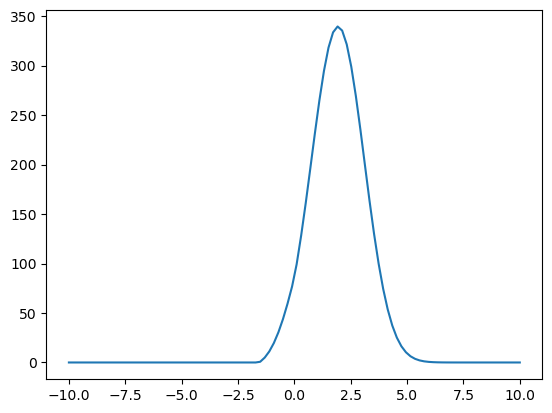

In [66]:
beta=1.1
S0=150
K=90
r=0.05
tau = 1
mu=1
omega=1

X=linspace(-10,10,100)

Y=[call_price_density(x,beta,mu,omega,S0,K,r,tau)  for x in X]
plt.plot(X,Y)